 ### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

- Output: Number of predicted wins (W)

In [74]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [75]:
#importing dataset
data= pd.read_html(r'https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv')
data= data[0]
data

,Unnamed: 0,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,NaN,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,NaN,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,NaN,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,NaN,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,NaN,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,NaN,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,NaN,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,NaN,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,NaN,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,NaN,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Unnamed: 0 varibale contains only the null value and it has nothing to do with the prediction of win. Thus we can remove that column from the dataset.

In [76]:
#dropping the column
data= data.drop(columns='Unnamed: 0')
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [77]:
data.shape

(30, 17)

In [78]:
#checking if there's any missing values
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [79]:
#Checking all datatypes are integers or float
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [80]:
#Descriptive statistics
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


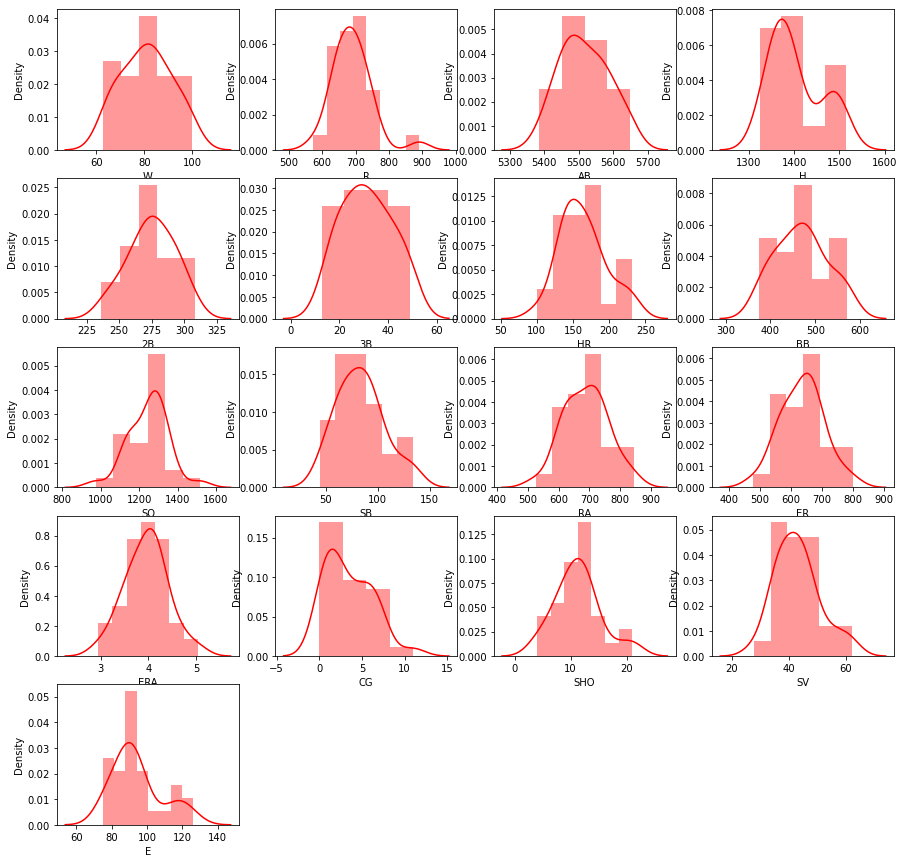

In [81]:
#seeing the distribution of each variables
plt.figure(figsize=(15,15),facecolor='white')
numberplot=1
for i in data.columns:
    plt.subplot(5,4,numberplot)
    sns.distplot(data[i],kde=True,color='r',label=i)
    numberplot+=1
plt.show()

Most of the variables are normaly distributed.Some variables has some skewness in them. 

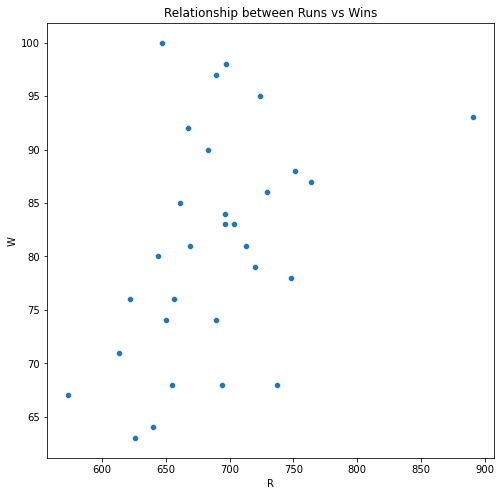

In [82]:
#lets see the relationship with the target variable
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between Runs vs Wins')
sns.scatterplot(x='R',y='W',data=data)
plt.show()

As the runs increases, no of predictive wins also increases. which says it is somewhat positively correlated.

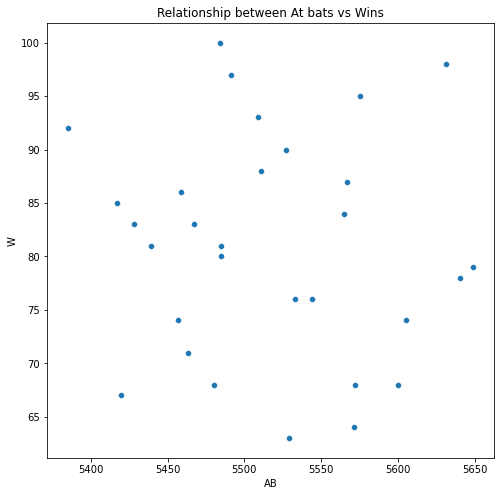

In [83]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between At bats vs Wins')
sns.scatterplot(x='AB',y='W',data=data)
plt.show()

The Graph shows it has may be the least relation with the AB. because there is no pattern in it.

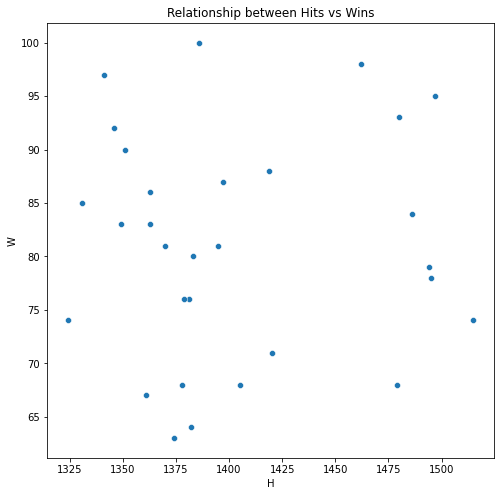

In [84]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between Hits vs Wins')
sns.scatterplot(x='H',y='W',data=data)
plt.show()

Hits may also have no relationship with the wins variables.

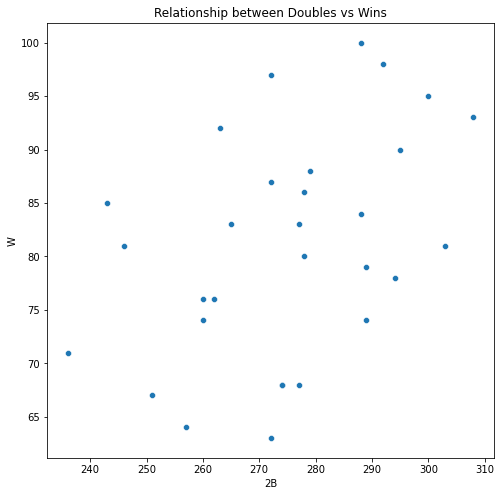

In [85]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between Doubles vs Wins')
sns.scatterplot(x='2B',y='W',data=data)
plt.show()

Doubles variable has less positive relationship with wins.

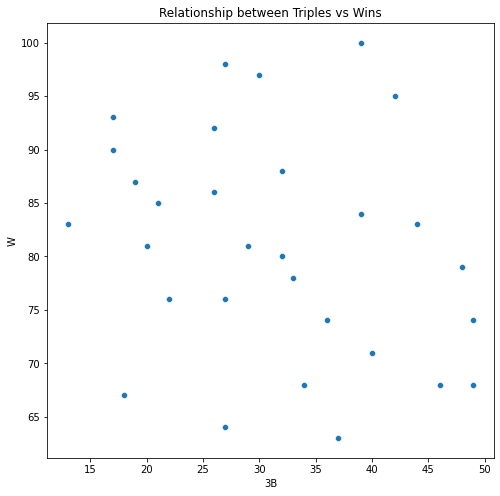

In [86]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between Triples vs Wins')
sns.scatterplot(x='3B',y='W',data=data)
plt.show()

It may be the same as for doubles.

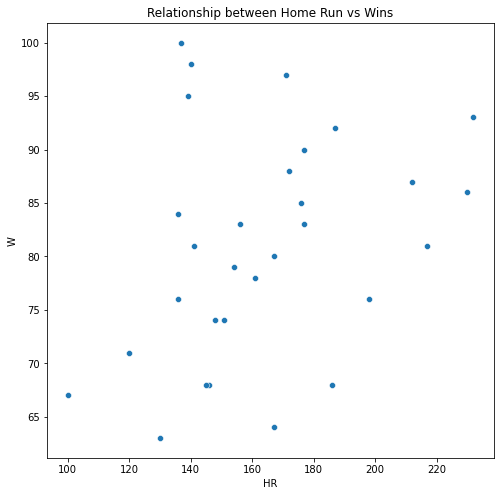

In [87]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between Home Run vs Wins')
sns.scatterplot(x='HR',y='W',data=data)
plt.show()

Less Positive relationship between Home run and wins

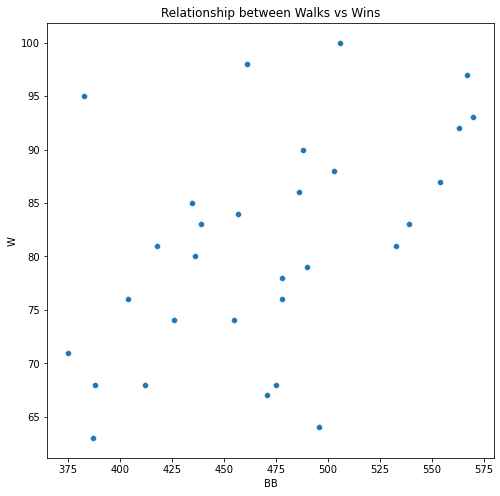

In [88]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between Walks vs Wins')
sns.scatterplot(x='BB',y='W',data=data)
plt.show()

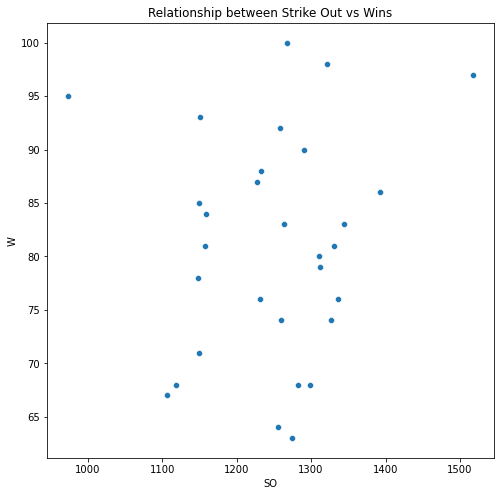

In [89]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between Strike Out vs Wins')
sns.scatterplot(x='SO',y='W',data=data)
plt.show()

No Relationship between them.

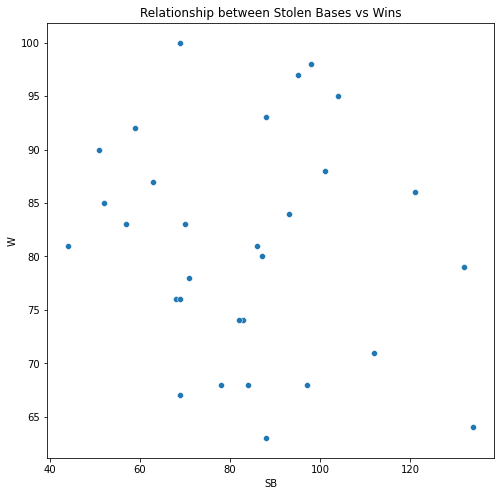

In [90]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between Stolen Bases vs Wins')
sns.scatterplot(x='SB',y='W',data=data)
plt.show()

No relationship.

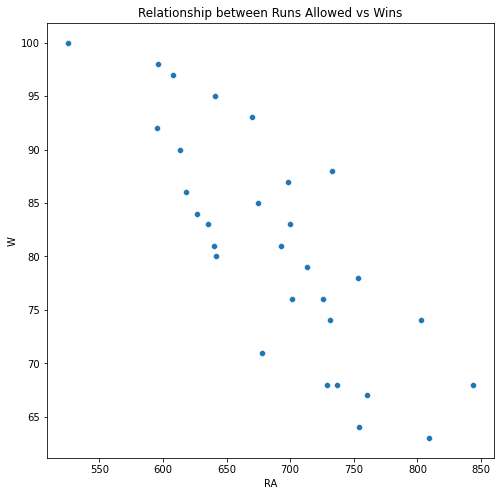

In [91]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between Runs Allowed vs Wins')
sns.scatterplot(x='RA',y='W',data=data)
plt.show()

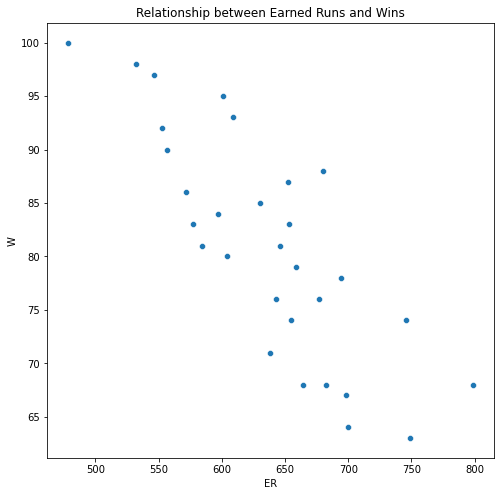

In [92]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between Earned Runs and Wins')
sns.scatterplot(x='ER',y='W',data=data)
plt.show()

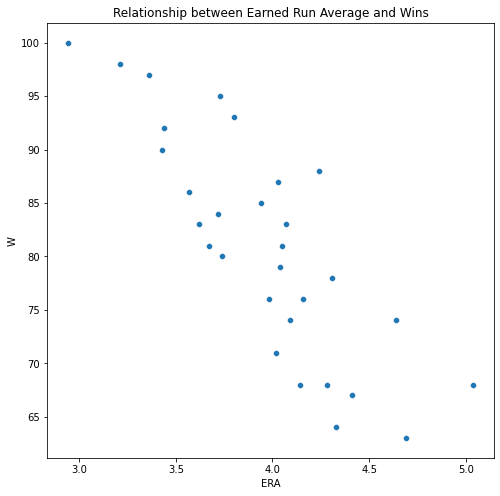

In [93]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between Earned Run Average and Wins')
sns.scatterplot(x='ERA',y='W',data=data)
plt.show()

Runs allowed, Earned Runs, Earned Runs Average variables has negative relationship between them.

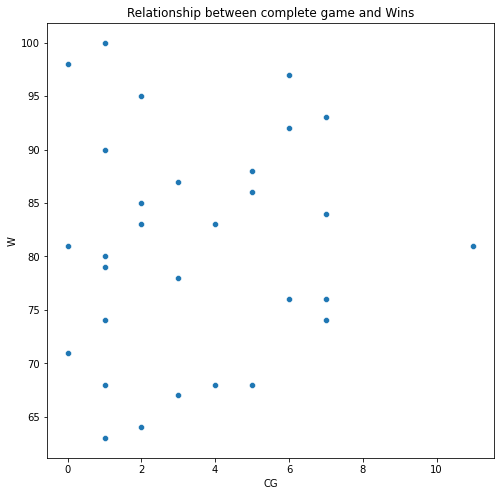

In [94]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between complete game and Wins')
sns.scatterplot(x='CG',y='W',data=data)
plt.show()

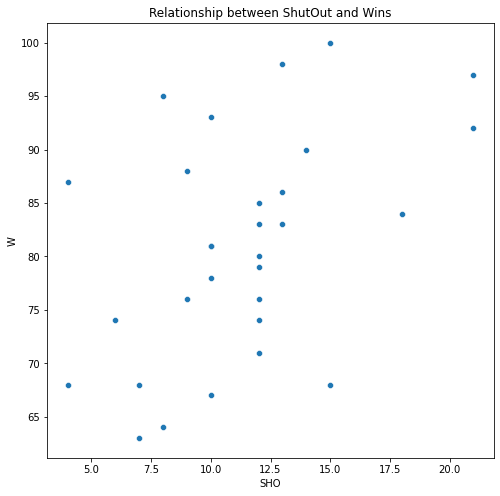

In [95]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between ShutOut and Wins')
sns.scatterplot(x='SHO',y='W',data=data)
plt.show()

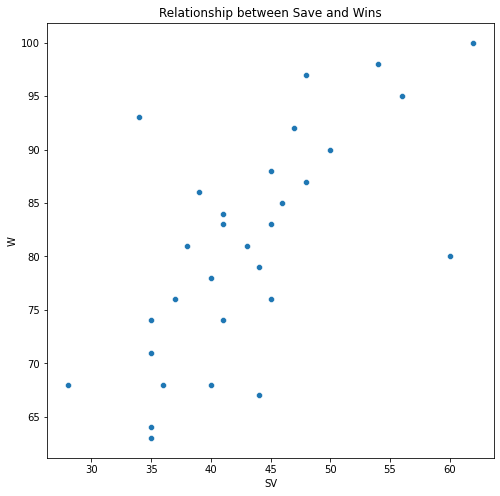

In [96]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between Save and Wins')
sns.scatterplot(x='SV',y='W',data=data)
plt.show()

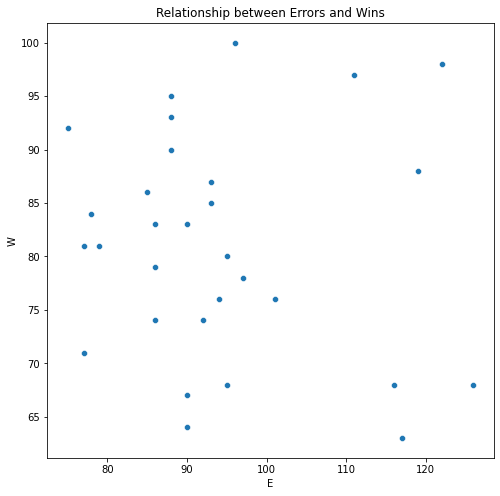

In [97]:
plt.figure(figsize=(8,8),facecolor='white')
plt.title('Relationship between Errors and Wins')
sns.scatterplot(x='E',y='W',data=data)
plt.show()

Remaining variables complete variables, errors, saves, shoutout has no relationship.

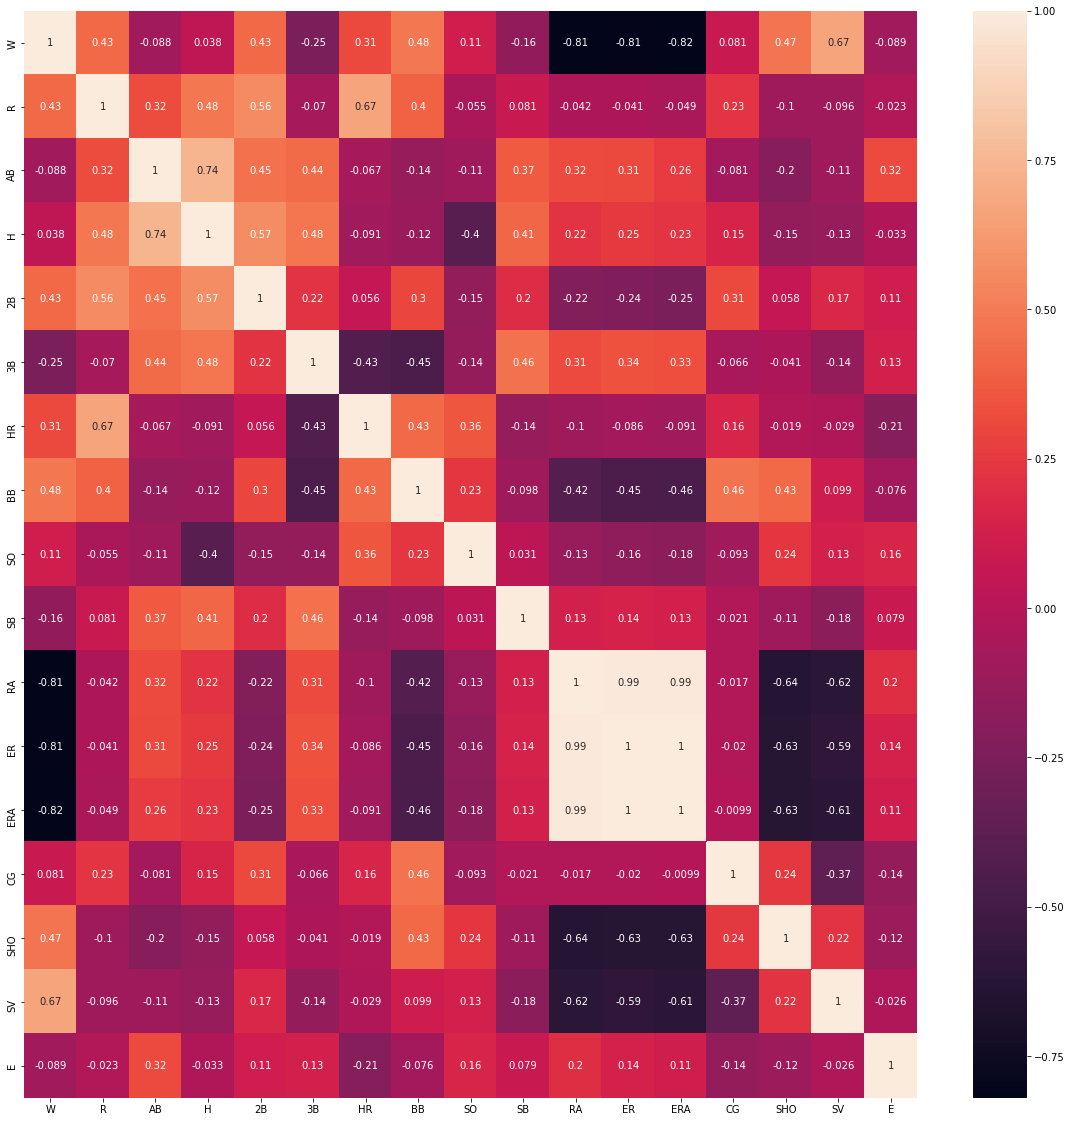

In [98]:
#checking the correlation with the target and multicollinearity with other features
corr_= data.corr()
plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(corr_,annot=True)
plt.show()

There are some multicollinearity between features. Eg, Runs and Home run are 67% correlated.

In [99]:
#splitting the dataset
x= data.drop(columns='W')
y=data.W

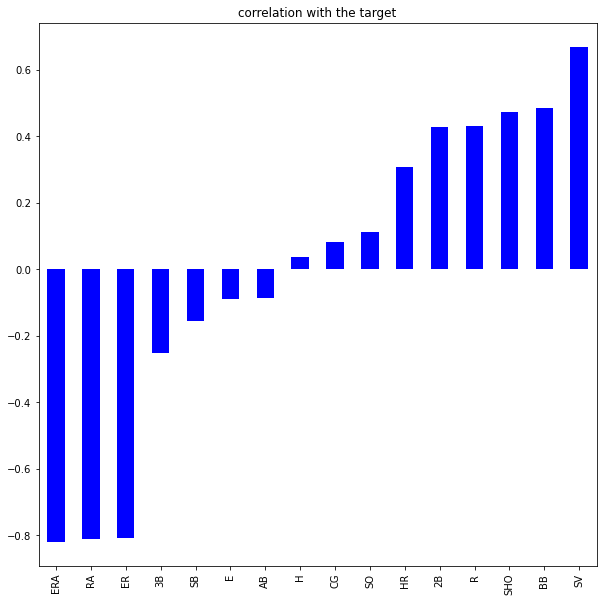

In [100]:
#correlation with the target
corr_x= x.corrwith(y)
plt.figure(figsize=(10,10),facecolor='white')
corr_x.sort_values(ascending=True).plot(kind='bar',color='b',title='correlation with the target')
plt.show()

ERA,RA,ER are strongly negatively correlated and SV,BB, SHO are positively correlated with the target.

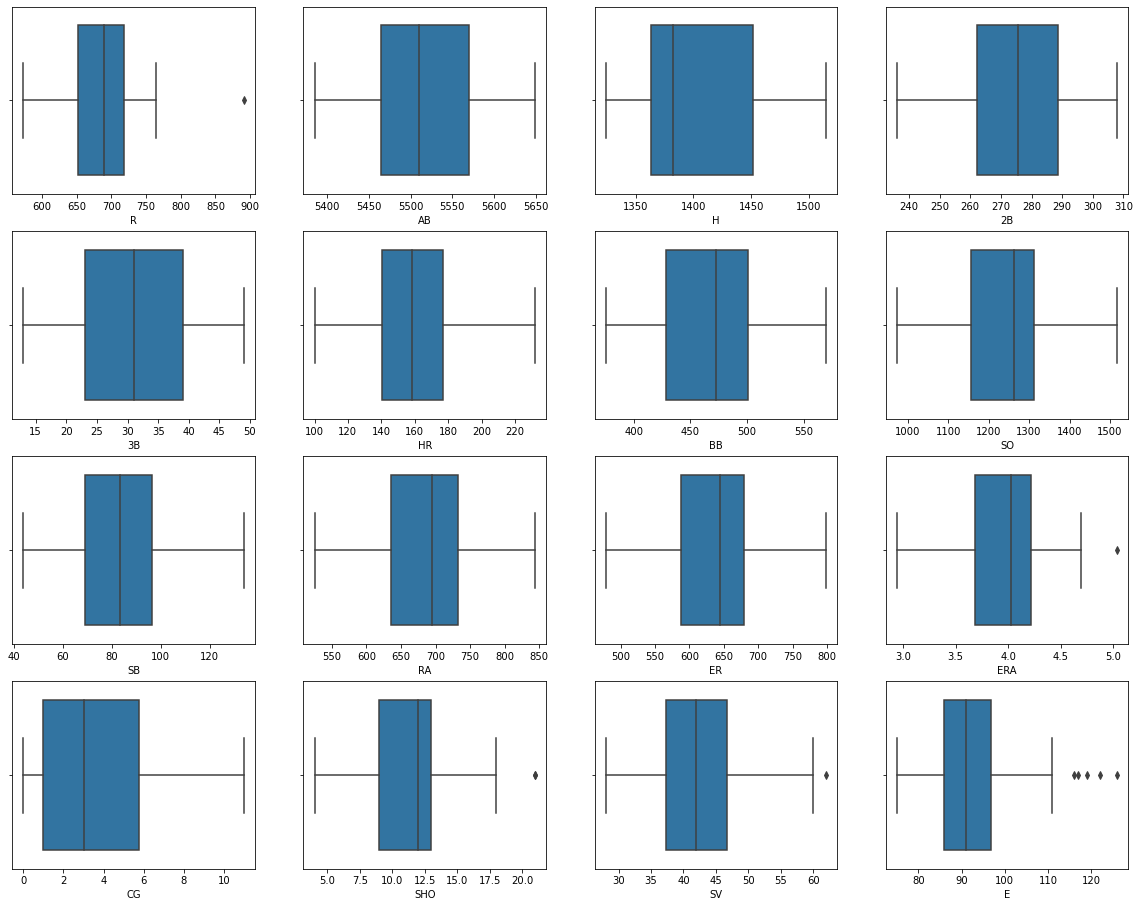

In [101]:
plt.figure(figsize=(20,20),facecolor='white')
numplot=1
for column in x.columns:
    plt.subplot(5,4,numplot)
    sns.boxplot(x[column])
    numplot+=1
plt.show()

In [102]:
#removing the columns whose standard deviation is greater than 3 to remove outliers.
from scipy.stats import zscore
score= x[np.abs(zscore(x))>3].index[0]
x.drop(index=score,inplace=True)
y.drop(index=score,inplace=True)
x.reset_index(drop=True)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


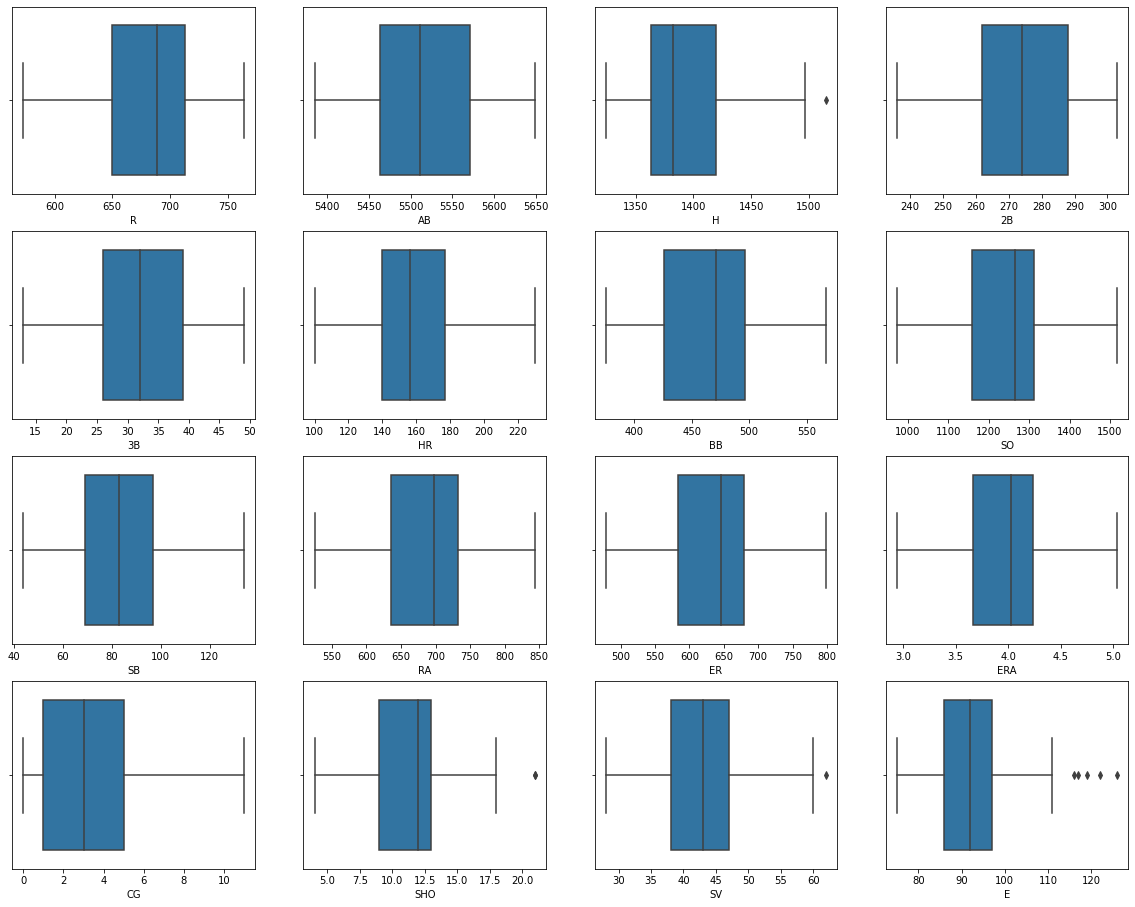

In [103]:
#visualizing after removing the outliers
plt.figure(figsize=(20,20),facecolor='white')
numplot=1
for column in x.columns:
    plt.subplot(5,4,numplot)
    sns.boxplot(x[column])
    numplot+=1
plt.show()

some features still have some outliers but there are close to the whikes of the boxplot and within the standard deviation of 3. so, it fine to leave them. skewness is also below +/- 0.5.

In [116]:
#standardising each features within a range using standard scaler
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x= pd.DataFrame(scalar.fit_transform(x),columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.617213,-0.570122,0.211006,1.757915


Creating multiple models and see which gives best score out of others.

In [105]:
#selecting  the best random state variable
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


max_score=0
trainscore=0
maxrs=0
for i in range(0,1000):
    rf= RandomForestRegressor()
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    train_pred= rf.predict(x_train)
    test_pred= rf.predict(x_test)
    score= r2_score(y_test,test_pred)
    trainscore= r2_score(y_train,train_pred)
    if score > max_score:
        max_score=score
        maxrx = i
        print(f'At random state {i} the training score is {trainscore} and test score {score}')
    

After the iteration the best random state is 70

In [117]:
#splitting the dataset into train and test
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=70)

In [118]:
#best cross fold value
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvs= cross_val_score(rf,x,y,cv=j)
    cvs_mean= cvs.mean()
    print(f'At cross fold {j} cross value score is {cvs_mean}')

At cross fold 2 cross value score is 0.022046108368638573
At cross fold 3 cross value score is -0.1296500862430013
At cross fold 4 cross value score is 0.5125841330440267
At cross fold 5 cross value score is -0.7239641101351871
At cross fold 6 cross value score is -0.3881048534243883
At cross fold 7 cross value score is 0.024475653578125707
At cross fold 8 cross value score is -0.2359715534789361
At cross fold 9 cross value score is -11.012383910901569


As you can see some of the cross validation score is worst , But k fold- 4 gives a cross validation score of around 51%.

In [125]:
#LinearRegression
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

#cross valuation
cvs= cross_val_score(lr,x,y,cv=4)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 4 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score -0.1934547711675998
cross valuation mean for cross fold 4 is -0.24334983064486176
Mean Squared Error 82.2157731248791


In [124]:
#lasso model for reglularization
from sklearn.linear_model import Lasso,LassoCV
lassocv= LassoCV()
lassocv.fit(x_train,y_train)
print('alpha value:',lassocv.alpha_)
ls= Lasso(alpha=lassocv.alpha_)
ls.fit(x_train,y_train)
y_lspred= ls.predict(x_test)

#cross valuation
cvs= cross_val_score(lassocv,x,y,cv=4)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_lspred))
print('cross valuation mean for cross fold 4 is',cvs_mean)
print('Mean squared error',mean_squared_error(y_test,y_lspred))

alpha value: 0.8802254606238039
R2 score 0.7920436509586711
cross valuation mean for cross fold 4 is 0.6815822788616716
Mean squared error 14.3258818228471


In [126]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

#cross valuation
cvs= cross_val_score(dt,x,y,cv=4)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 4 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.33225806451612905
cross valuation mean for cross fold 4 is -0.2818961377079437
Mean Squared Error 46.0


In [128]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=4)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 4 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.6190486290322579
cross valuation mean for cross fold 4 is 0.5583362435776664
Mean Squared Error 26.243316666666686


In [129]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

#cross valuation
cvs= cross_val_score(gbr,x,y,cv=4)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 4 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.4619947313695193
cross valuation mean for cross fold 4 is 0.34918242841866376
Mean Squared Error 37.06258517232201


In [133]:
#xgboost
import xgboost 

xgb= xgboost.XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

#cross valuation
cvs= cross_val_score(xgb,x,y,cv=4)
cvs_mean= cvs.mean()

print('R2 score',r2_score(y_test,y_pred))
print('cross valuation mean for cross fold 4 is',cvs_mean)
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

R2 score 0.5644262585875338
cross valuation mean for cross fold 4 is 0.39190340102443544
Mean Squared Error 30.006191075081006


Out of all the models above RandomforestRegressor and GradientBoostRegressor. We will do the hyperparameter tuning for theses models.

In [112]:
# hyperparameter tuning for gradientBoostingregressor
from sklearn.model_selection import GridSearchCV

gbr=GradientBoostingRegressor()
param={'n_estimators':[100,500,1000],
       'learning_rate':[.001,0.01,.1,.2,.3,.4],
       'max_depth':[1,2,4],
       'subsample':[.1,.2,.3,.4,.5,.75,1]}

search= GridSearchCV(gbr,param_grid=param)
search.fit(x_train,y_train)
print(f'Best parameters is {search.best_params_}')

Best parameters is {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}


In [122]:
gbr= search.best_estimator_
gbr.fit(x_train,y_train)
print(f'our model fits {(gbr.score(x_train,y_train))*100}% of the dataset')
y_gbrpred=gbr.predict(x_test)
#cross valuation
cvs= cross_val_score(gbr,x,y,cv=4)
cvs_mean= cvs.mean()

print(f'our r2 score is {(r2_score(y_test,y_gbrpred)*100)}%')
print('cross valuation mean for cross fold 4 is',cvs_mean)

our model fits 100.0% of the dataset
our r2 score is 69.1708364856218%
cross valuation mean for cross fold 4 is 0.49999692896344516


In [138]:
#hyperparameter tuning for Randomforest
rf= RandomForestRegressor()
param= {'n_estimators':[10,100,200,500,1000],
        'criterion':["mse", "mae"],
        'max_depth':[2,5,6,7,9,],
        'min_samples_split':[3,5,10],
        'min_samples_leaf':[1,5,10]}

search= GridSearchCV(rf,param_grid=param)
search.fit(x_train,y_train)
print(f'Best parameters is {search.best_params_}')

Best parameters is {'criterion': 'mse', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 10}


In [139]:
rf= search.best_estimator_
rf.fit(x_train,y_train)
print(f'our model fits {(rf.score(x_train,y_train))*100}% of the dataset')
y_pred=rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=4)
cvs_mean= cvs.mean()

print(f'our r2 score is {(r2_score(y_test,y_pred)*100)}%')
print('cross valuation mean for cross fold 4 is',cvs_mean)

our model fits 73.97222975202699% of the dataset
our r2 score is 43.58932720835432%
cross valuation mean for cross fold 4 is 0.39028520585592813


***After doing hyperparameter tuning for both models. their score are:***
- **GradientBoostingRegressor model fits 100.0% of the dataset with R2 score is 69% & cross valuation mean for cross fold 4 is 0.49999692896344516.**
- **RandomForestRegressor model fits 73% of the dataset with R2 score is 43% & cross valuation mean for cross fold 4 is 0.39028520585592813**

GradientBoosting Regressor model may be overfitting. But it works good in the testing data and good crossvalidation score. The final model will be decided when we can test more observations with this model to see if it still performs well or not.

***For now We will choose GradientBoostingRegressor model has our final model.***

In [ ]:
#saving the model
import pickle
pickle.dump(gbr,open('Baseball_Case_Study.pkl','wb'))